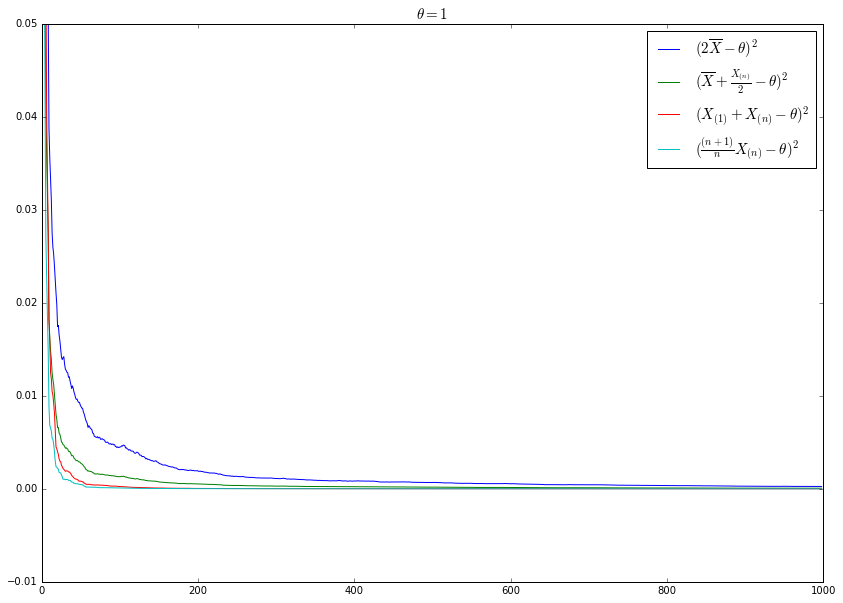

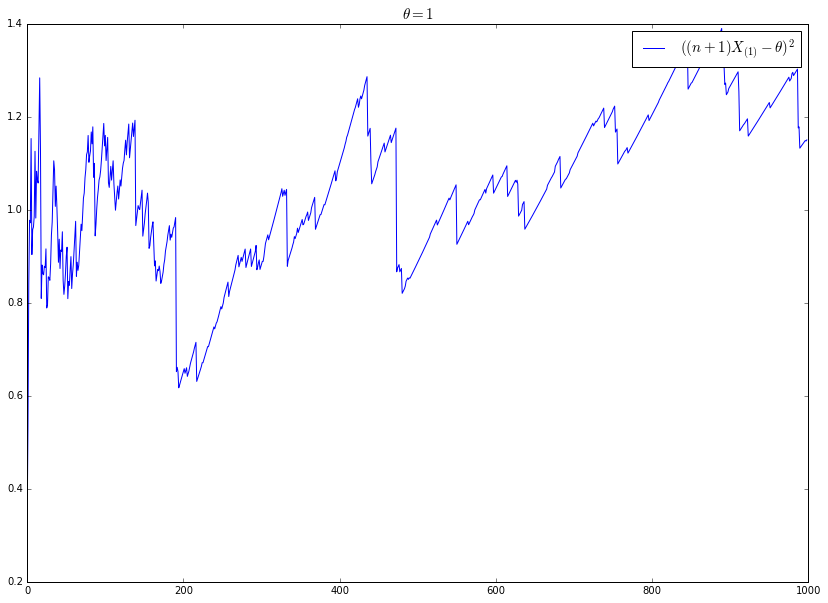

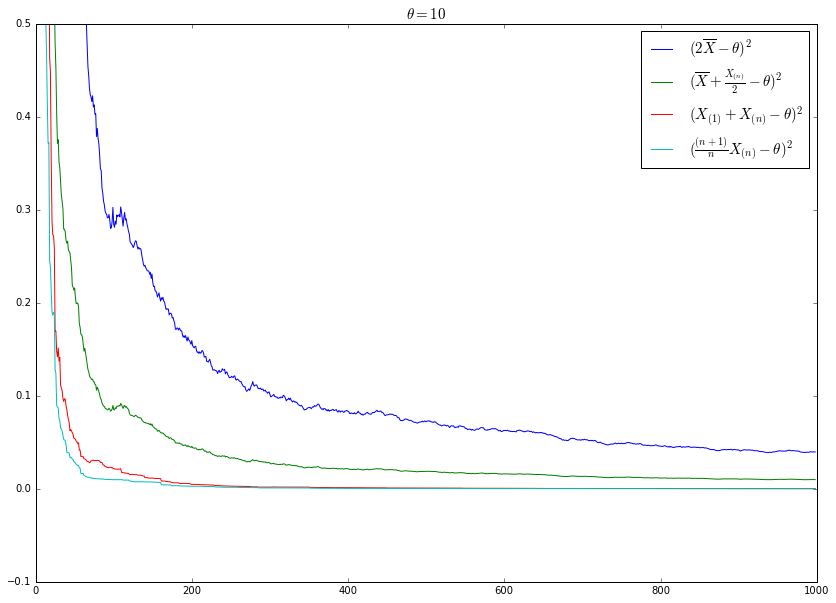

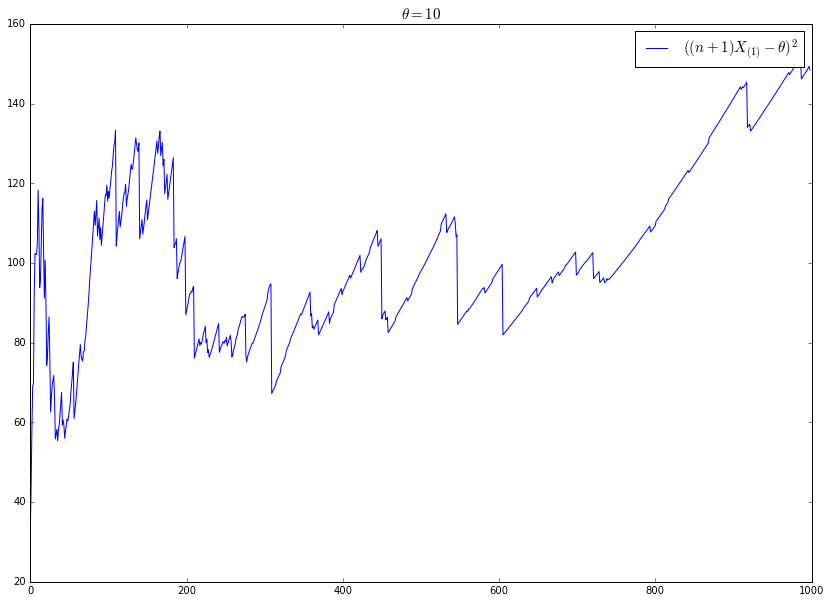

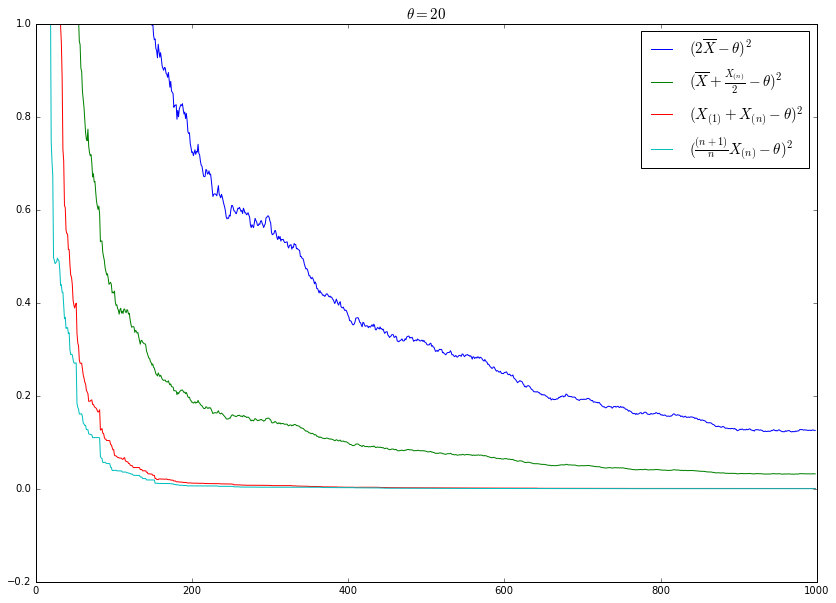

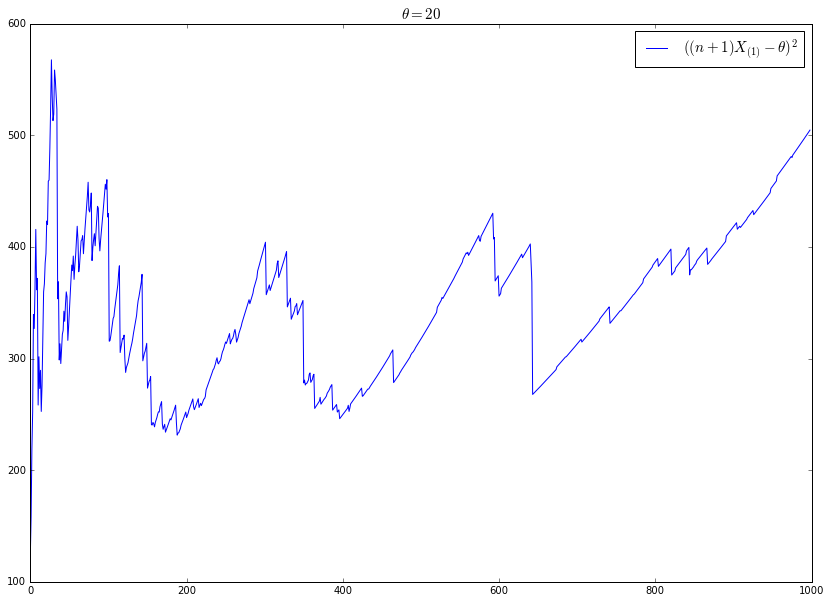

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.stats import uniform

def make_labels(labels):
    labels.append("$(2\\overline{X} - \\theta)^2$")
    labels.append("$(\\overline{X} + \\frac{X_{(n)}}{2} - \\theta)^2$")
    labels.append("$((n+1)X_{(1)} - \\theta)^2$")
    labels.append("$(X_{(1)} + X_{(n)} - \\theta)^2$")
    labels.append("$(\\frac{(n+1)}{n}X_{(n)} - \\theta)^2$")
    

def init_graph(theta):
    plt.figure(figsize=(14, 10))
    plt.title("$\\theta = " + str(theta) + "$", fontsize=15)
    
    
def show_graph(indexes):
    for i in indexes:
        average = [np.mean([arr_square[i][m][n] for m in range(M)]) for n in range(1, N)]
        plt.plot(average, label=labels[i])

    plt.legend(fontsize=15)
    plt.show()

M = 100
N = 1000

thetas = [1, 10, 20]

arr_square = [[[]]] * 5
for i in range(5):
    arr_square[i] = [[]] * M

labels = []
make_labels(labels)

for theta in thetas:
    # generate samples from uniform distribution
    for m in range(M):
        x = np.random.uniform(0, theta, N)

        arr = [[[]]] * 5
        for i in range(5):
            arr[i] = np.zeros(N)
        x_1 = theta
        x_n = 0
        nsum = 0

        # parameter estimations
        for index in range(1, N):
            x_1 = min(x[index], x_1)
            x_n = max(x[index], x_n)
            nsum += x[index]
            arr[0][index] = nsum * 2 / index
            arr[1][index] = nsum / index + x_n / 2
            arr[2][index] = (index + 1) * x_1
            arr[3][index] = x_1 + x_n
            arr[4][index] = (index + 1) / index * x_n

        for i in range(5):
            arr_square[i][m] = abs(arr[i] - theta) ** 2

    init_graph(theta)
    plt.ylim(-theta / 100, theta / 20)
    show_graph([0, 1, 3, 4])
    
    init_graph(theta)
    show_graph([2])